## Project 2 Submission

Please fill out:
* Student name: Anni Liu
* Instructor name: Hardik Idnani


In [1]:
# Import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics, linear_model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
# Import data

data=pd.read_csv(r'C:\Users\AnnieLiu\Desktop\King-County-House-Sales\data\kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


##### Data descriptions:

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sq_ft living - Square footage of living space

sqft_lot - Square footage of the lot

sqft_above - Square footage of the house

sqft_basement - Square footage of the basement

lat - latitude coordinate

long - longitude coordinate

sqft_living15 - The square footage of interior living space of surrounding 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

floors - total floors in the house

waterfront - view of waterfront of house

view - number of times the house has been viewed

condition - how good the condition of the house is

grade - overall grade of housing unit condition,based on King County grading system

yr_renovated - when house was last renovated

zipcode - location of the house

month_sold- month of when the house was sold

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Data Cleaning & EDA

In [5]:
data.shape

(21597, 21)

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
data.sort_values("price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1,5,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,2,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,1,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449


In [9]:
data.sort_values("price", ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1.0,NaN,4,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,3,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1.0,4.0,3,12,6350,290.0,2004,0.0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0.0,0.0,3,12,6430,0.0,2001,0.0,98004,47.6208,-122.219,3720,14592


In [10]:
data.sort_values("price", ascending=False).tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13743,1788900230,7/22/2014,86500.0,3,1.00,840,9480,1.0,0.0,0.0,3,6,840,0.0,1960,0.0,98023,47.3277,-122.341,840,9420
10242,2422049104,9/15/2014,85000.0,2,1.00,830,9000,1.0,0.0,0.0,3,6,830,0.0,1939,0.0,98032,47.3813,-122.243,1160,7680
16700,1322049150,3/5/2015,85000.0,2,1.00,910,9753,1.0,0.0,0.0,3,5,910,0.0,1947,0.0,98032,47.3897,-122.236,1160,7405
3763,1523049188,4/30/2015,84000.0,2,1.00,700,20130,1.0,0.0,0.0,3,6,700,0.0,1949,0.0,98168,47.4752,-122.271,1490,18630
18453,7999600180,5/29/2014,83000.0,2,1.00,900,8580,1.0,0.0,0.0,3,5,900,0.0,1918,0.0,98168,47.4727,-122.270,2060,6533
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,1,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,2,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1,5,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [12]:
# check for duplicates

duplicates = data[data.duplicated()]
print(len(duplicates))

0


In [13]:
# Cheking for rows with same id

data['id'].duplicated().sum()


177

Houses may have been sold more than one, we will keep them as unique data.

In [14]:
# Check for missing values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [15]:
# Summary of data columns

data.view.describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [16]:
# Replace null values in 'view' with median 
data.view = data.view.fillna(value=data.view.median())

In [17]:
data.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [18]:
data.waterfront.describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [19]:
# Replace with null (most properties were not waterfront anyways)
data.waterfront=data.waterfront.fillna(value=data.waterfront.median())

In [20]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


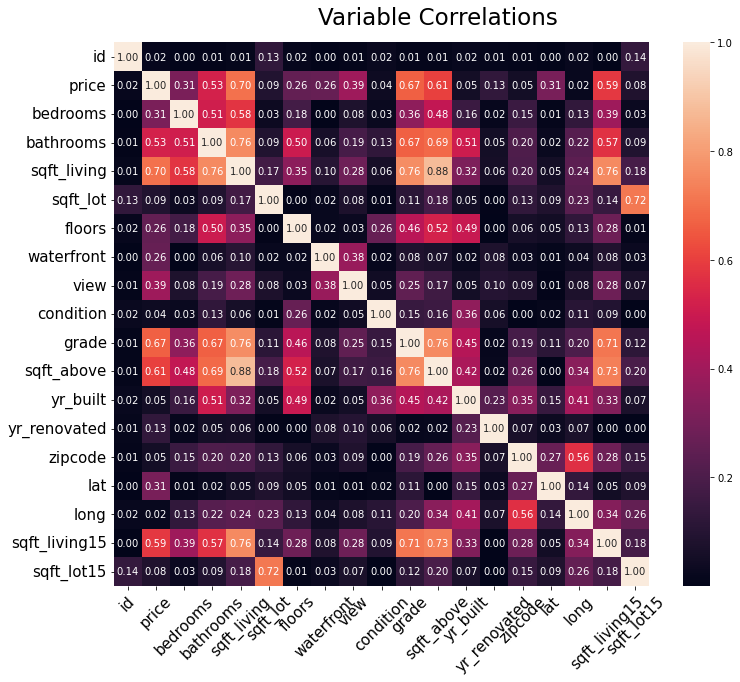

In [22]:
corr = data.corr().abs()
fig, ax=plt.subplots(figsize=(12,10))
fig.suptitle('Variable Correlations', fontsize=23, y=.93)
h = sns.heatmap(corr, annot=True, fmt='.2f')
h.set_xticklabels(h.get_xmajorticklabels(), fontsize = 15, rotation=45)
h.set_yticklabels(h.get_ymajorticklabels(), fontsize = 15);

Sqft_living, grade, sqft_above and Sqft_living15, bathrooms, condition strongly correlated with price.

In [23]:
# Drop unnecessary columns
data = data.drop(['id','sqft_lot15', 'zipcode', 'lat', 'long'], axis=1)

C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Property prices')

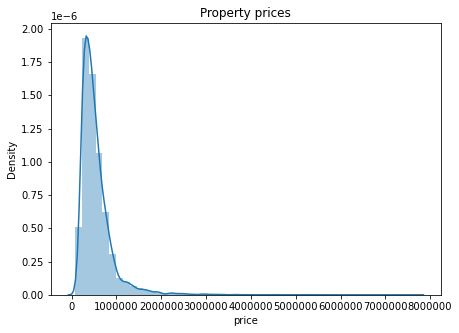

In [24]:
plt.figure(figsize= (7,5))
sns.distplot(data['price'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Property prices')

Most properties sub $1mil. With positively skewed data. Rather than drop these we instead log-transform these variables.

In [25]:
data['log_price']= np.log(data['price'])
data['log_sqft_living']=np.log(data['sqft_living'])

array([[<AxesSubplot:title={'center':'log_price'}>,
        <AxesSubplot:title={'center':'log_sqft_living'}>]], dtype=object)

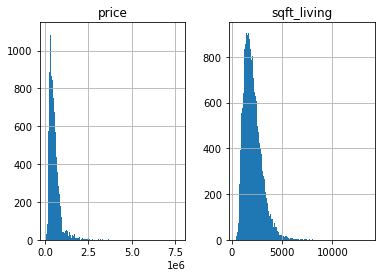

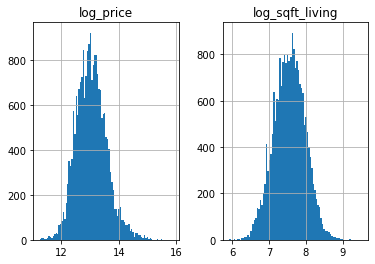

In [26]:
data.hist(column=['price', 'sqft_living'], bins='auto')
data.hist(column=['log_price', 'log_sqft_living'], bins='auto')

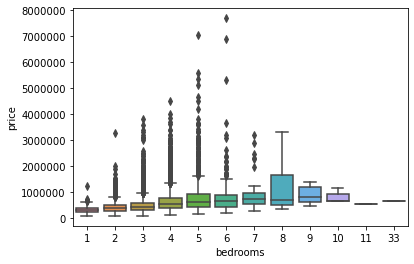

In [27]:
sns.boxplot(x='bedrooms', y='price', data=data)
plt.ticklabel_format(style='plain', axis='y')

C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

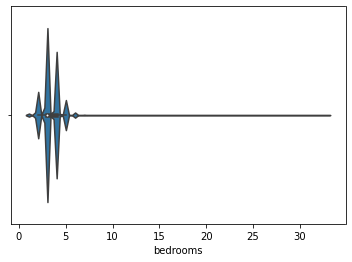

In [28]:
# 33 bedrooms seems excessive, let's have a closer look

plt.figure(figsize=(6,4))
sns.violinplot(data.bedrooms)

In [29]:
# Looks like most bedrooms are scattered between 1-6

In [30]:
# Determine outliers

data.bedrooms.sort_values(ascending=False).head(10)

15856    33
8748     11
13301    10
19239    10
15147    10
6073      9
4231      9
16830     9
8537      9
4092      9
Name: bedrooms, dtype: int64

In [31]:
data.bedrooms.sort_values(ascending=False).tail(5)

12472    1
13316    1
7010     1
3578     1
14373    1
Name: bedrooms, dtype: int64

In [32]:
# Check data for larger bedrooms i.e. 33, 11 and 10 bedrooms
print(data.loc[[15856]]) # Unlikely to fit 33 bedrooms in 6000 sqft_lot
print(data.loc[[8748]]) # Unlikely to fit 11 bedroom in 4960 sqft_lot
print(data.loc[[13301]])
print(data.loc[[19239]]) #Unlikely to fit 10 bedroom in 3745 sqft_lot
print(data.loc[[15147]])
print(data.loc[[14373]])

            date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15856  6/25/2014  640000.0        33       1.75         1620      6000   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
15856     1.0         0.0   0.0          5      7        1040         580.0   

       yr_built  yr_renovated  sqft_living15  log_price  log_sqft_living  
15856      1947           0.0           1330  13.369223         7.390181  
           date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8748  8/21/2014  520000.0        11        3.0         3000      4960     2.0   

      waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
8748         0.0   0.0          3      7        2400         600.0      1918   

      yr_renovated  sqft_living15  log_price  log_sqft_living  
8748        1999.0           1420  13.161584         8.006368  
            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
13301  8/14/201

In [33]:
# Drop the unlikely rows from index

df = data.drop(data.index[[15856,8748,19239]])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,log_price,log_sqft_living
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,1340,12.309982,7.073270
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,13.195614,7.851661
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,2720,12.100712,6.646391
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,13.311329,7.580700
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,13.142166,7.426549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,1530,12.793859,7.333023
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,1830,12.899220,7.745003
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,1020,12.904459,6.927558
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,1410,12.899220,7.377759


Does selling date/season impact price of properties?

In [34]:
# Date conversion

df['date'] = pd.to_datetime(df['date'])

In [35]:
# Date conversion to month to assess seasonsability effects

df['month_sold'] = df['date'].dt.month

In [36]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,log_price,log_sqft_living,month_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,1340,12.309982,7.073270,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,13.195614,7.851661,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,2720,12.100712,6.646391,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,13.311329,7.580700,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,13.142166,7.426549,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,1530,12.793859,7.333023,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,1830,12.899220,7.745003,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,1020,12.904459,6.927558,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,1410,12.899220,7.377759,1


### Assumptions of Linear regression

C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


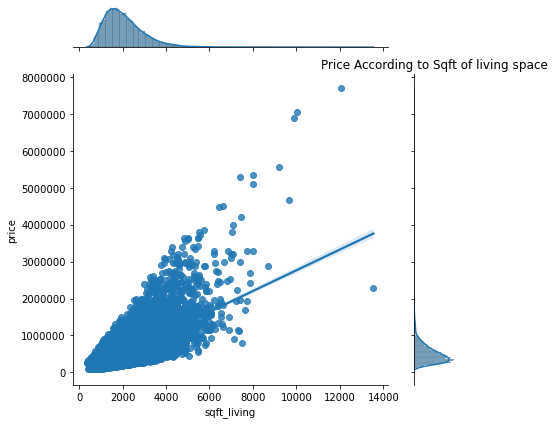

In [37]:
# examining the relationship between sqft_living and price
sns.jointplot('sqft_living','price', data=df, kind='reg')
plt.title("Price According to Sqft of living space")
plt.tight_layout()
plt.ticklabel_format(style='plain')


Sqft living and price have high positive correlation. Statistical test to confirm using Pearson's Correlation Coefficient as there are two continuous variables.

In [38]:
corr = pearsonr(df.sqft_living, df.price)
corr

(0.701949326358472, 0.0)

0.7 strong correlation - Apply feature in our model.

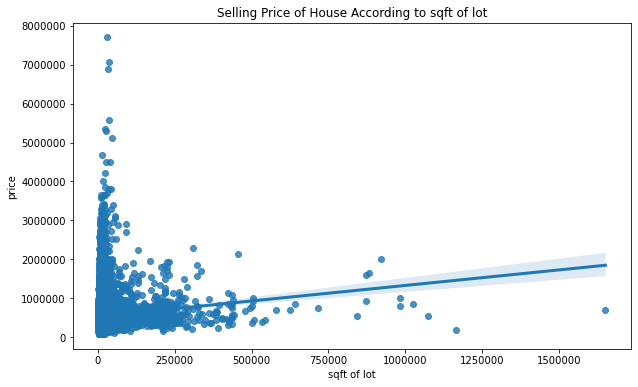

In [39]:
# Does the same for the entire property size? 

fig, ax = plt.subplots(figsize=(10,6))
plt.style.use('bmh')
sns.regplot(data=df, x='sqft_lot', y='price')

ax.set_xlabel('sqft of lot', fontsize=10)
ax.set_ylabel('price', fontsize=10)
ax.set_title('Selling Price of House According to sqft of lot', fontsize=12)
ax.ticklabel_format(style='plain')

Larger property size does not equate to a higher price. Not much correlation between property size and sales either.

In [40]:
new_corr = pearsonr(df.sqft_lot, df.price)
new_corr

(0.0898832559024816, 5.5626777243553564e-40)

Very weak, closer to no correlation at all.

### Feature engineering

Generate new features that could assist with final model predictions.

##### Feature 1: 'Month' sold vs price relationship

[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sept'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

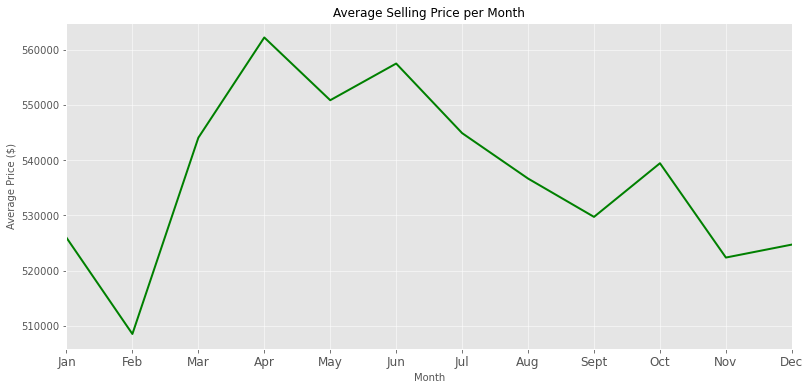

In [41]:
# creating a graph of average price per month to visualize if there's a trend
df.sort_values(by='month_sold', ascending=True)
months = sorted(df['month_sold'].unique())
# getting the average price for each month
avg_price = df.groupby('month_sold')['price'].mean()

# instantiating plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(13,6))
ax.plot(months, avg_price, color='green')
# setting title and axis labels
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Average Price ($)', fontsize=10)
ax.set_title('Average Selling Price per Month', fontsize=12)
# setting month labels
ax.set_xlim(1, 12)
ax.set_xticks((1,2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], fontsize=12)


February indicates very low sales prices. Whilst May-June generate highest prices.

#### Hypotheses. ANOVA test -  month_sold and price

We want to test how each month impacts the prices of properties sold.

Null Hypothesis: No relationship between features and target variable, price.
Alternative Hypothesis: There is relationship between our features and our target variable, price.
Significance level (alpha) of 0.05 to determine.

In [42]:
# creating a sample measurement for each month, using the month value as the first argument, and price as the continuous variable
jan = df.loc[df['month_sold'] == 1, 'price']
feb = df.loc[df['month_sold'] == 2, 'price']
mar = df.loc[df['month_sold'] == 3, 'price']
apr = df.loc[df['month_sold'] == 4, 'price']
may = df.loc[df['month_sold'] == 5, 'price']
jun = df.loc[df['month_sold'] == 6, 'price']
jul = df.loc[df['month_sold'] == 7, 'price']
aug = df.loc[df['month_sold'] == 8, 'price']
sep = df.loc[df['month_sold'] == 9, 'price']
otb = df.loc[df['month_sold'] == 10, 'price']
nov = df.loc[df['month_sold'] == 11, 'price']
dec = df.loc[df['month_sold'] == 12, 'price']

# using scipy function f_oneway to conduct an ANOVA test for the f-statistic
sp.stats.f_oneway(jan,feb,mar,apr,may,jun,jul,aug,sep,otb,nov,dec)

F_onewayResult(statistic=3.0692820292498273, pvalue=0.0003984321988882857)

Output:

* f-statistic: 3.06928 

* p-value: 0.00039

F-value suggests significant variance between mean price for each month is pretty high. P-value to reject null hypothesis, each month sees different selling prices for each house.

Month sold therefore impacts how much a property can sell for.


##### Feature 2: Age of property

Assess relationship between price and age of property.

In [43]:
# subtracting 'yr_built' with the current year
df['age'] = 2022 - df['yr_built']


In [44]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,log_price,log_sqft_living,month_sold,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,1340,12.309982,7.073270,10,67
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,13.195614,7.851661,12,71
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,2720,12.100712,6.646391,2,89
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,13.311329,7.580700,12,57
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,13.142166,7.426549,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,1530,12.793859,7.333023,5,13
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,1830,12.899220,7.745003,2,8
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,1020,12.904459,6.927558,6,13
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,1410,12.899220,7.377759,1,18


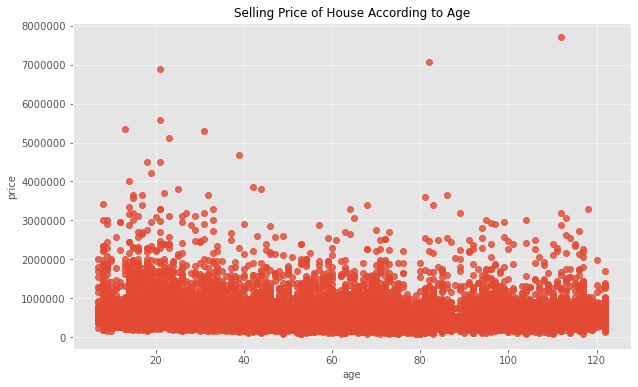

In [45]:
# Age of building vs price

fig, ax = plt.subplots(figsize=(10,6))
plt.style.use('bmh')
sns.regplot(data=df, x='age', y='price')

ax.set_xlabel('age', fontsize=10)
ax.set_ylabel('price', fontsize=10)
ax.set_title('Selling Price of House According to Age', fontsize=12)
ax.ticklabel_format(style='plain')

No visible relationships.

##### Feature 3: Waterfront

Assess relationship between price and waterfront vs non waterfront properties.

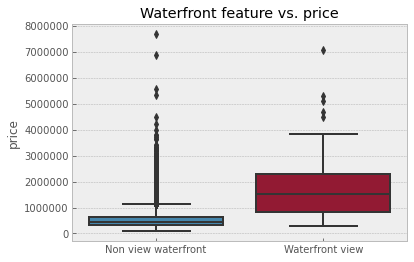

In [46]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df['waterfront'], y = df['price'])
plt.title("Waterfront feature vs. price")
plt.ylabel("price")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel(None)
plt.xticks(np.arange(2), ('Non view waterfront', 'Waterfront view'))
plt.show()

We can see the above boxplot that not having a waterfront view provides significantly lower minimum, median, Q1 and Q3 values than than having a waterfront view. However, We can see that there are still outliers in the prices for not having a waterfront view.

In [47]:
waterfrontmean = df[df['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = df[df['waterfront'] == 0]['price'].mean()
print(f"Mean waterfront view: {round(waterfrontmean,2)}")
print(f"Mean without waterfront view: {round(nonwaterfrontmean,2)}")

Mean waterfront view: 1717214.73
Mean without waterfront view: 532275.82


In [48]:
len(df[df['waterfront'] == 1])/len(df)*100

0.6761137352968417

Waterfront views homes double in price of non waterfront views. Only 0.67% of properties have waterfront views.

In [49]:
# Find other correlations other than correlations with price

df.corr()['price'].sort_values()

age               -0.053999
month_sold        -0.009952
condition          0.036017
yr_built           0.053999
sqft_lot           0.089883
yr_renovated       0.129706
floors             0.256820
waterfront         0.264310
bedrooms           0.316790
view               0.393509
bathrooms          0.525934
sqft_living15      0.585280
sqft_above         0.605402
log_sqft_living    0.611866
grade              0.667982
sqft_living        0.701949
log_price          0.891749
price              1.000000
Name: price, dtype: float64

#### Business Question Results

1. Do houses sell for more money when they have more living pace?
* Yes

2. Do houses with higher total property size sell for more?
* No

3. On average, what month generates highest prices?
* Lowest prices in February. Meanwhile, it's on average the highest prices to sell a house in April to June.

4. Do properties with waterfront views cost more  than non waterfront view properties?
* Yes

#### Modeling with Train-test Split:

Split the housing data apart. 
The 'train set' will be used to fit the model to our data.
The 'test set' will simulate new and unseen data, which we will disregard until the end of the analysis.
Test-train split with a built-in function in sklearn

##### Train-test split of data:

In [50]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

17275 train + 4319 test


##### Variables x_train, y_train, x_test and y_test:

In [51]:
# only keeping features
X = df.drop(labels=['log_price'], axis = 1)

# split target variable, which we're trying to predict
y = df.log_price

In [52]:
# performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [53]:
df = pd.concat([pd.DataFrame(y_train), X_train], axis=1).reset_index(drop=True)
df.head()

,log_price,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,log_sqft_living,month_sold,age
0,12.028739,2014-09-24,167500.0,3,1.00,760,3090,1.0,0.0,0.0,2,5,760,0.0,1903,0.0,1020,6.633318,9,119
1,12.765688,2015-03-02,350000.0,2,1.50,1150,7552,1.0,0.0,1.0,3,7,1150,0.0,1944,0.0,1910,7.047517,3,78
2,12.745486,2015-04-17,343000.0,3,1.00,1410,18600,1.0,0.0,0.0,5,7,1410,0.0,1960,NaN,1610,7.251345,4,62
3,13.416524,2014-07-05,671000.0,4,3.00,3130,5700,1.5,0.0,0.0,3,7,1750,1380.0,1953,0.0,2080,8.048788,7,69
4,13.287878,2014-07-18,590000.0,4,2.75,2910,10650,1.0,0.0,2.0,3,8,1780,1130.0,1975,0.0,2920,7.975908,7,47


### Baseline model

Find worst fit to compare real models against it later.

In [54]:
baseline_model=sm.formula.ols(formula='log_price ~ log_sqft_living', data=df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                 1.339e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        16:30:39   Log-Likelihood:                -7709.6
No. Observations:               16195   AIC:                         1.542e+04
Df Residuals:                   16193   BIC:                         1.544e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7107      0.055    122.287      0.000       6.603       6.818
log_sqft_living     0.8393      0.007    115.702      0.000       0.825       0.853
==============================================================================
Omnibus:                       99.647   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.830
Skew:                           0.140   Prob(JB):                     3.12e-20
Kurtosis:                       2.767   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The baseline model has an  of 0.452.

Below we check residuals and mean square error.

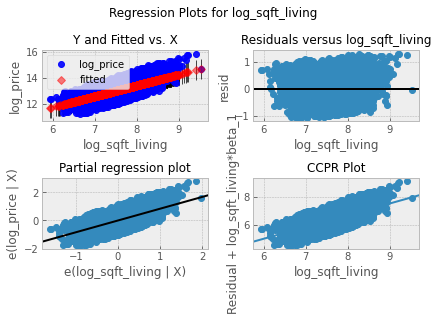

In [55]:
fig = sm.graphics.plot_regress_exog(baseline_model, "log_sqft_living")
fig.tight_layout(pad=1.0)

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


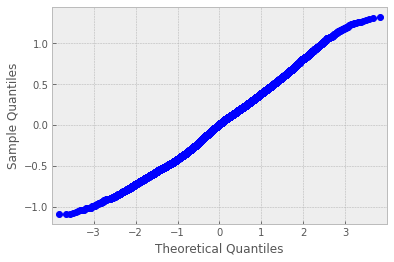

In [56]:
res = baseline_model.resid # residuals
fig = sm.qqplot(res)
plt.show()

In [57]:
from statsmodels.tools.eval_measures import mse
y_train_preds = baseline_model.predict(X_train)
y_test_preds = baseline_model.predict(X_test)
baseline_train_mse = mse(y_train_preds, y_train)
baseline_test_mse = mse(y_test_preds, y_test)

print('Baseline mse on training data: ', baseline_train_mse)
print('Baseline mse on testing data:  ', baseline_test_mse)

Baseline mse on training data:  0.15171102849100518
Baseline mse on testing data:   0.1489045671946136


The Q-Q plot suggests model and data qualify assumptions of linearity. Our mse values are similar for both training and testing data, there model is neither over nor under fit.

### Model 1

Use selected features for iterations. After it's fit and predicted on, then i'll use feature selection to specifically edit features.

Use statsmodels to assess R-Squared and feature coefficients.
Apply sklearn to fit the model to the training data. From there, we can predict on y and generate an RMSE for how the model performs on the training data.
From there, we can do a similar transform & predict procedure on the testing data and generate an RMSE.
With the RMSE of how the model performs on the training and testing sets, we can determine whether the model is underfit or overfit.

In [58]:
# generating model with statsmodels
first_model = ols(formula='log_price~bedrooms+bathrooms+log_sqft_living+sqft_living15+sqft_above+floors+waterfront+view+condition+grade+month_sold+age', 
                data=train_set).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2774.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        16:30:42   Log-Likelihood:                -4200.1
No. Observations:               17275   AIC:                             8426.
Df Residuals:                   17262   BIC:                             8527.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.9868      0.087     91.973      0.000       7.817       8.157
bedrooms           -0.0403      0.004    -11.455      0.000      -0.047      -0.033
bathrooms           0.0901      0.005     16.588      0.000       0.079       0.101
log_sqft_living     0.3561      0.014     25.814      0.000       0.329       0.383
sqft_living15       0.0001   5.76e-06     19.949      0.000       0.000       0.000
sqft_above      -5.132e-05   6.19e-06     -8.286      0.000   -6.35e-05   -3.92e-05
floors              0.1082      0.006     18.577      0.000       0.097       0.120
waterfront          0.3896      0.032     12.311      0.000       0.328       0.452
view                0.0441      0.004     12.386      0.000       0.037       0.051
condition           0.0373      0.004      9.433      0.000       0.030       0.045
grade               0.2101      0.004     58.778      0.000       0.203       0.217
month_sold         -0.0048      0.001     -6.297      0.000      -0.006      -0.003
age                 0.0060      0.000     56.484      0.000       0.006       0.006
==============================================================================
Omnibus:                       31.112   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.332
Skew:                          -0.064   Prob(JB):                     3.51e-08
Kurtosis:                       3.177   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model is much better than the baseline. The R-Squared is 0.65 , which indicates our model accounts for 65% of the variance in house prices.

Let's check residuals and mean square error again:

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


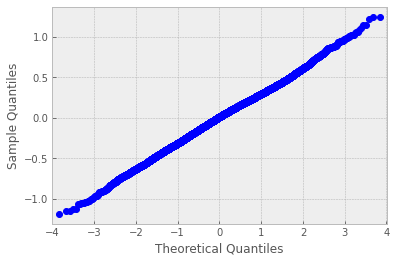

In [59]:
res = first_model.resid # residuals
fig = sm.qqplot(res)
plt.show()

In [60]:
y_train_preds = first_model.predict(X_train)
y_test_preds = first_model.predict(X_test)
baseline_train_mse = mse(y_train_preds, y_train)
baseline_test_mse = mse(y_test_preds, y_test)

print('Baseline mse on training data: ', baseline_train_mse)
print('Baseline mse on testing data:  ', baseline_test_mse)

Baseline mse on training data:  0.09573144937902844
Baseline mse on testing data:   0.0952156093117503


The Q-Q plot is still close to linearity. The mse values have improved from the baseline model. Training and testing similarity mse continue to suggest our model has consistent predictive power for seen and unseen data.

#### Check for Multicollinearity

In [61]:
# creating a numerical correlation matrix
corr_matrix = X_train.corr().abs()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,log_sqft_living,month_sold,age
price,1.000000,0.314107,0.523606,0.702007,0.094128,0.257842,0.268634,0.394080,0.033877,0.666978,0.607587,0.053540,0.131219,0.580846,0.609416,0.011152,0.053540
bedrooms,0.314107,1.000000,0.530387,0.592688,0.041639,0.187754,0.004002,0.081313,0.026666,0.364918,0.491857,0.160535,0.020282,0.405409,0.638430,0.002799,0.160535
bathrooms,0.523606,0.530387,1.000000,0.756289,0.095612,0.500470,0.070222,0.186128,0.120634,0.663816,0.686399,0.505471,0.051647,0.574111,0.762937,0.007901,0.505471
sqft_living,0.702007,0.592688,0.756289,1.000000,0.179720,0.353782,0.106753,0.278521,0.060053,0.761849,0.877058,0.318037,0.056861,0.756173,0.953475,0.009773,0.318037
sqft_lot,0.094128,0.041639,0.095612,0.179720,1.000000,0.001261,0.021163,0.076676,0.009889,0.120731,0.188646,0.058047,0.005407,0.140503,0.157049,0.002864,0.058047
floors,0.257842,0.187754,0.500470,0.353782,0.001261,1.000000,0.027203,0.031178,0.264061,0.458870,0.524934,0.489119,0.000245,0.281529,0.367771,0.016030,0.489119
waterfront,0.268634,0.004002,0.070222,0.106753,0.021163,0.027203,1.000000,0.381840,0.013112,0.085311,0.075264,0.019676,0.093676,0.080100,0.079630,0.009891,0.019676
view,0.394080,0.081313,0.186128,0.278521,0.076676,0.031178,0.381840,1.000000,0.048815,0.246375,0.164486,0.057458,0.103094,0.271883,0.240703,0.008519,0.057458
condition,0.033877,0.026666,0.120634,0.060053,0.009889,0.264061,0.013112,0.048815,1.000000,0.148864,0.159302,0.361274,0.061208,0.095135,0.050508,0.014675,0.361274
grade,0.666978,0.364918,0.663816,0.761849,0.120731,0.458870,0.085311,0.246375,0.148864,1.000000,0.756475,0.446322,0.013952,0.717909,0.741254,0.009033,0.446322


C:\Users\AnnieLiu\AppData\Local\Temp/ipykernel_89900/1541954998.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Model 1 Correlation Matrix')

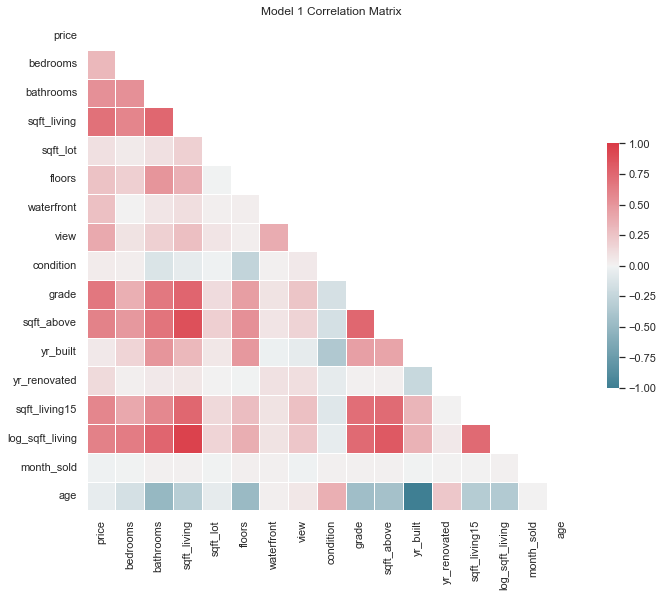

In [62]:
# creating a correlation heatmap, to easily visualize high correlations and refer back to the numerical matrix
sns.set(style="white")
# compute the correlation matrix
corr = X_train.corr()
# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Model 1 Correlation Matrix')


In [63]:
df.corr()['grade'].sort_values()

age               -0.446322
condition         -0.148864
month_sold         0.009033
yr_renovated       0.013952
waterfront         0.085311
sqft_lot           0.120731
view               0.246375
bedrooms           0.364918
yr_built           0.446322
floors             0.458870
bathrooms          0.663816
price              0.666978
log_price          0.703979
sqft_living15      0.717909
log_sqft_living    0.741254
sqft_above         0.756475
sqft_living        0.761849
grade              1.000000
Name: grade, dtype: float64

From the correlation matrix, it looks like the feature with the most correlation issues is grade. That feature has two of the highest correlation coefficients.

correlation are greatest represented by Sqft_above, sqft_living15, and bathrooms.

Let's try dropping grade completely for the next model iteration and see if there's any changes.

### Model 2

This model is same as first but without grade feature.

In [64]:
## fitting the model to the training data:
# setting 'X_train_2' to the features I want to fit in this first model
X_train_2 = X_train[['bedrooms', 'bathrooms', 'log_sqft_living', 'floors', 'waterfront', 'view', 'condition', 'month_sold', 'age']]

# instantiate LinearRegression to use
# coefficients are learnt and stored in 'model_2'
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train)

## predicting on the y (price) for train_set
y_pred = model_2.predict(X_train_2)

# get the RMSE for the train_set
model_2_rsme = mean_squared_error(y_train, y_pred, squared=False)
model_2_rsme

0.35169017809792824

In [65]:
## transforming and .predict on the test_set
X_test_2 = X_test[['bedrooms', 'bathrooms', 'log_sqft_living', 'floors', 'waterfront', 'view', 'condition', 'month_sold', 'age']]

testing_model_2 = LinearRegression().fit(X_train_2, y_train)

## predicting on the y (price) for test_set
y_pred_test = testing_model_2.predict(X_test_2)

# get the RMSE for the test_set
testing_model_2_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
testing_model_2_rmse

0.349859287115632

We will use model 1 - replace Grade as it gave us a better results.

### Refitting final model to df dataset

In [66]:
features = df[['bedrooms', 'bathrooms', 'log_sqft_living', 'sqft_above', 'sqft_living15', 'floors', 'waterfront', 'view', 'condition', 'grade', 'month_sold', 'age']]

In [67]:
# price column of whole dataset
target = df.price

In [68]:
# instantiating final model
final_model = LinearRegression()

# fit the linear regression to the data
final_model = final_model.fit(features,target)

In [69]:
# checking final model coefficients
final_model.coef_

array([-2.12359873e+04,  1.01245808e+05, -1.13599348e+04,  1.03325271e+02,
        3.94985974e+01, -1.07594014e+04,  6.41183646e+05,  5.78741551e+04,
        2.25227739e+04,  1.41021407e+05, -2.47059074e+03,  4.17143367e+03])

### Final model

In [70]:
features

,bedrooms,bathrooms,log_sqft_living,sqft_above,sqft_living15,floors,waterfront,view,condition,grade,month_sold,age
0,3,1.00,6.633318,760,1020,1.0,0.0,0.0,2,5,9,119
1,2,1.50,7.047517,1150,1910,1.0,0.0,1.0,3,7,3,78
2,3,1.00,7.251345,1410,1610,1.0,0.0,0.0,5,7,4,62
3,4,3.00,8.048788,1750,2080,1.5,0.0,0.0,3,7,7,69
4,4,2.75,7.975908,1780,2920,1.0,0.0,2.0,3,8,7,47
...,...,...,...,...,...,...,...,...,...,...,...,...
16190,4,2.00,7.714231,2240,2500,1.0,0.0,0.0,5,8,3,74
16191,3,1.50,7.461640,1740,1830,1.0,0.0,0.0,3,7,5,66
16192,3,2.50,7.727535,2270,2270,2.0,0.0,0.0,3,8,8,19
16193,3,2.50,7.807917,2460,2090,2.0,0.0,0.0,4,9,3,45


C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\AnnieLiu\AppData\Local\Temp/ipykernel_89900/2731933473.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


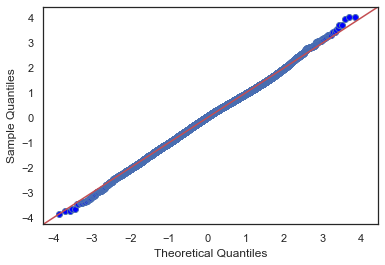

In [71]:
import scipy.stats as stats
residuals = first_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [72]:
features.to_csv('housing_features.csv')

In [73]:
# setting the pickle file as 'model'

pickle_out = open("model.pickle","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()

In [74]:
final_model = pickle.load(open('model.pickle', 'rb'))

In [75]:
#Prediction from features

prediction = final_model.predict(features)

In [76]:
# Export predictions

prediction = pd.DataFrame(prediction, columns=['predictions'])

In [77]:
prediction.head()

,predictions
0,159047.099934
1,507885.833483
2,366684.326645
3,563938.999115
4,746111.914912


In [78]:
prediction.to_csv('housing_predictions.csv')

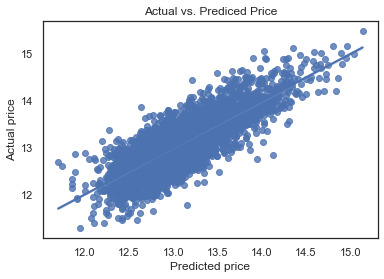

In [80]:
sns.regplot(x=y_test_preds, y=y_test)
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Actual vs. Prediced Price")
plt.show()